In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
df_train = pd.read_excel('./data/Data_Train.xlsx')
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df_train.dropna(axis=0,inplace=True)
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df_train["Journey_day"] = pd.to_datetime(df_train["Date_of_Journey"], format="%d/%m/%Y").dt.day
df_train["Journey_month"] = pd.to_datetime(df_train["Date_of_Journey"], format="%d/%m/%Y").dt.month
df_train["Dep_hour"] = pd.to_datetime(df_train["Dep_Time"]).dt.hour
df_train["Dep_min"] = pd.to_datetime(df_train["Dep_Time"]).dt.minute
df_train["Arrival_hour"] = pd.to_datetime(df_train["Arrival_Time"]).dt.hour
df_train["Arrival_min"] = pd.to_datetime(df_train["Arrival_Time"]).dt.minute
df_train["Week_end"] = pd.to_datetime(df_train["Date_of_Journey"], format="%d/%m/%Y").map(lambda x:x.weekday())
df_train["Week_end"] = df_train["Week_end"].map(lambda x: 1 if (x>=4 and x<=6) else 0)
df_train.drop(["Date_of_Journey" , "Dep_Time" , "Arrival_Time"], axis = 1, inplace = True)

In [5]:
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Week_end
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,1
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,1


In [6]:
duration = list(df_train["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:   
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"  
        else:
            duration[i] = "0h " + duration[i]
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))
df_train["Duration_hours"] = duration_hours
df_train["Duration_mins"] = duration_mins
df_train.drop(["Duration"], axis = 1, inplace = True)

C:\Users\saran\anaconda3\envs\flight_fare_prediction\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Price', ylabel='Airline'>

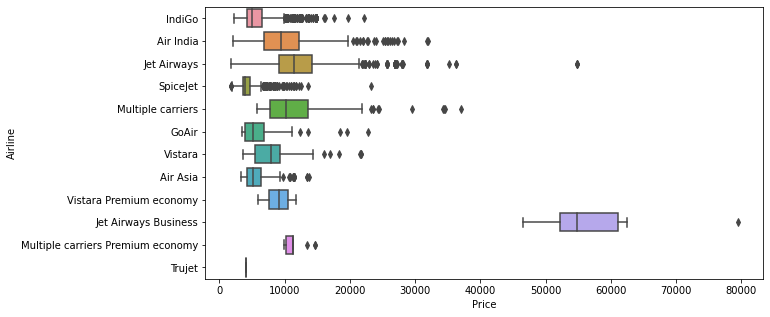

In [7]:
plt.figure(figsize=(10,5))
sns.boxplot(df_train['Price'] , df_train['Airline'])

C:\Users\saran\anaconda3\envs\flight_fare_prediction\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Price', ylabel='Total_Stops'>

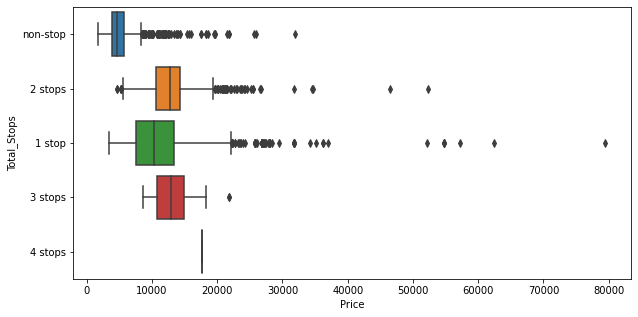

In [8]:
plt.figure(figsize=(10,5))
sns.boxplot(df_train['Price'] , df_train['Total_Stops'])

In [9]:
Airline = df_train[["Airline"]]
Source = df_train[["Source"]]
Destination = df_train[["Destination"]]
Airline = pd.get_dummies(Airline, drop_first= True)
Source = pd.get_dummies(Source, drop_first= True)
Destination = pd.get_dummies(Destination, drop_first = True)
df_train.drop(["Route", "Additional_Info","Airline","Source","Destination"], axis = 1, inplace = True)

In [10]:
df_train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
df_train = pd.concat([df_train, Airline, Source, Destination], axis = 1)
df_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Week_end,Duration_hours,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,1,2,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,0,7,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,1,19,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,1,5,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,1,4,...,0,0,0,0,0,0,0,0,0,1


In [11]:
df_test = pd.read_excel('./data/Test_set.xlsx')
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [12]:
df_test.dropna(axis=0,inplace = True)
df_test["Journey_day"] = pd.to_datetime(df_test["Date_of_Journey"], format="%d/%m/%Y").dt.day
df_test["Journey_month"] = pd.to_datetime(df_test["Date_of_Journey"], format = "%d/%m/%Y").dt.month

df_test["Dep_hour"] = pd.to_datetime(df_test["Dep_Time"]).dt.hour
df_test["Dep_min"] = pd.to_datetime(df_test["Dep_Time"]).dt.minute

df_test["Arrival_hour"] = pd.to_datetime(df_test.Arrival_Time).dt.hour
df_test["Arrival_min"] = pd.to_datetime(df_test.Arrival_Time).dt.minute

df_test["Week_end"] = pd.to_datetime(df_test["Date_of_Journey"], format="%d/%m/%Y").map(lambda x:x.weekday())
df_test["Week_end"] = df_test["Week_end"].map(lambda x: 1 if (x>=4 and x<=6) else 0)

duration = list(df_test["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))
df_test["Duration_hours"] = duration_hours
df_test["Duration_mins"] = duration_mins

Airline = pd.get_dummies(df_test["Airline"], drop_first= True)
Source = pd.get_dummies(df_test["Source"], drop_first= True)
Destination = pd.get_dummies(df_test["Destination"], drop_first = True)
df_test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
df_test = pd.concat([df_test, Airline, Source, Destination], axis = 1)

df_test.drop(["Airline", "Source", "Destination","Route", "Additional_Info","Arrival_Time","Date_of_Journey","Dep_Time" ,"Duration"], axis = 1, inplace = True)
df_test.insert(18 , 'Trujet' , [0 for i in range(df_test.shape[0])] , True)
df_test.dropna(axis=0,inplace=True)
print(df_test.shape)

(2671, 30)


In [13]:
df_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Week_end,Duration_hours,Duration_mins,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,0,10,55,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,1,4,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,0,23,45,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,0,13,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,0,2,50,...,0,0,0,0,0,0,1,0,0,0


In [14]:
for col in df_train.columns:
    df_train[col] = df_train[col].replace(np.nan, 0)
for col in df_test.columns:
    df_test[col] = df_test[col].replace(np.nan, 0)
    
X_train = df_train[['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Week_end', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
y = df_train['Price']

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train, y, test_size=0.1)

In [18]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Epoch 1/150
151/151 [==============================] - 1s 4ms/step - loss: 37577572.0000
Epoch 2/150
151/151 [==============================] - 1s 4ms/step - loss: 15746877.0000
Epoch 3/150
151/151 [==============================] - 1s 4ms/step - loss: 13683211.0000
Epoch 4/150
151/151 [==============================] - 1s 4ms/step - loss: 11695981.0000
Epoch 5/150
151/151 [==============================] - 1s 4ms/step - loss: 10201009.0000
Epoch 6/150
151/151 [==============================] - 1s 4ms/step - loss: 9328789.0000
Epoch 7/150
151/151 [==============================] - 1s 4ms/step - loss: 8928459.0000
Epoch 8/150
151/151 [==============================] - 1s 4ms/step - loss: 8635708.0000
Epoch 9/150
151/151 [==============================] - 1s 4ms/step - loss: 8323483.5000
Epoch 10/150
151/151 [==============================] - 1s 4ms/step - loss: 8048245.0000
Epoch 11/150
151/151 [==============================] - 1s 4ms/step - loss: 7794758.5000
Epoch 12/150
151/151 [===

151/151 [==============================] - 1s 4ms/step - loss: 3464985.0000
Epoch 94/150
151/151 [==============================] - 1s 4ms/step - loss: 3435983.7500
Epoch 95/150
151/151 [==============================] - 1s 4ms/step - loss: 3431440.5000
Epoch 96/150
151/151 [==============================] - 1s 6ms/step - loss: 3363618.0000
Epoch 97/150
151/151 [==============================] - 1s 5ms/step - loss: 3356207.7500
Epoch 98/150
151/151 [==============================] - 1s 4ms/step - loss: 3348471.2500
Epoch 99/150
151/151 [==============================] - 1s 4ms/step - loss: 3324351.2500
Epoch 100/150
151/151 [==============================] - 1s 4ms/step - loss: 3364030.2500
Epoch 101/150
151/151 [==============================] - 1s 4ms/step - loss: 3336429.0000
Epoch 102/150
151/151 [==============================] - 1s 4ms/step - loss: 3351924.0000
Epoch 103/150
151/151 [==============================] - 1s 4ms/step - loss: 3292297.2500
Epoch 104/150
151/151 [=======

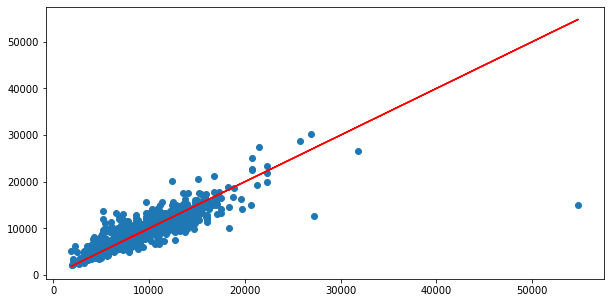

In [25]:
model4 = Sequential()

model4.add(Dense(512, input_shape=(30,), activation='relu'))
model4.add(Dense(512, activation='relu'))
model4.add(Dense(64, activation='relu'))
model4.add(Dense(1))
model4.compile(loss='mse', optimizer='adam')
model4.fit(x=x_train,y=y_train,
        
          batch_size=64,epochs=150)
model4.summary()
y_pred4 = model4.predict(x_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred4))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred4))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred4)
# Perfect predictions
plt.plot(y_test,y_test,'r')

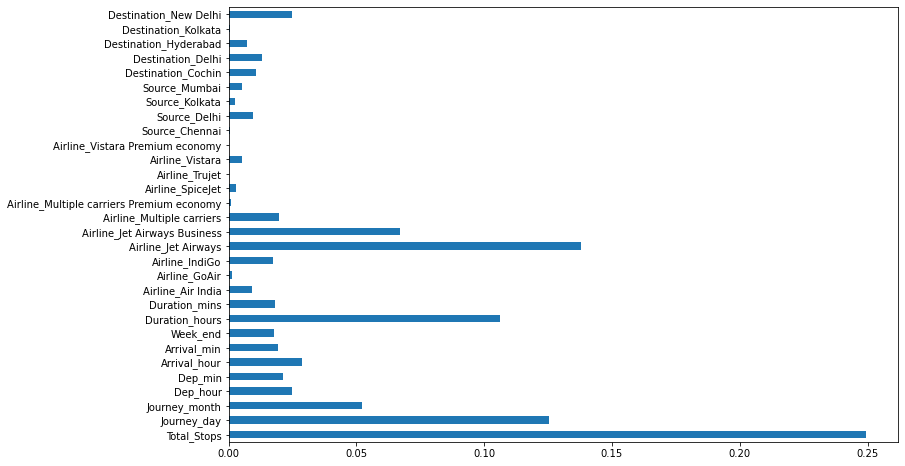

In [15]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X_train, y)

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X_train.columns)
feat_importances.plot(kind='barh')
plt.show()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=50, max_features=auto, min_samples_leaf=20, min_samples_split=75, n_estimators=1600; total time=  21.5s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=20, min_samples_split=75, n_estimators=1600; total time=  20.8s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=20, min_samples_split=75, n_estimators=1600; total time=  21.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=20, min_samples_split=75, n_estimators=1600; total time=  20.8s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=20, min_samples_split=75, n_estimators=1600; total time=  20.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_es

C:\Users\saran\anaconda3\envs\flight_fare_prediction\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


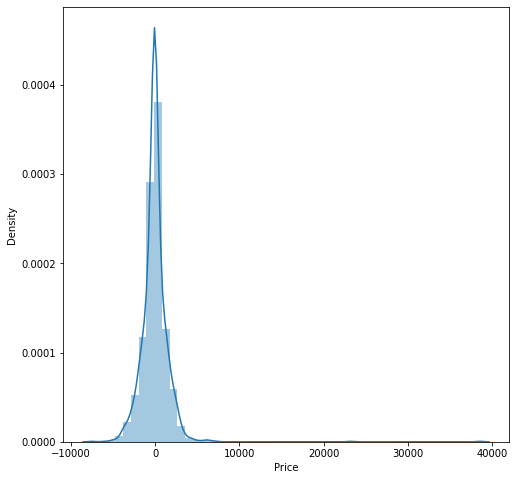

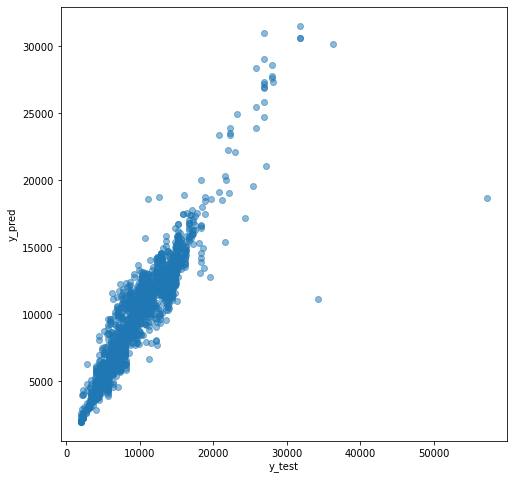

In [172]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 50, num = 10)]
min_samples_split = [2, 5, 10, 15, 40 , 75 ,100]
min_samples_leaf = [1, 2, 5, 10, 20, 30]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=0, random_state=42, n_jobs = 1)
rf_random.fit(X_train,y)

print('--------------')
print(rf_random.best_params_)


C:\Users\saran\anaconda3\envs\flight_fare_prediction\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Air India
- Chennai
- Cochin
- Delhi
- GoAir
- ...
Feature names seen at fit time, yet now missing:
- Airline_Air India
- Airline_GoAir
- Airline_IndiGo
- Airline_Jet Airways
- Airline_Jet Airways Business
- ...

  warnings.warn(message, FutureWarning)
C:\Users\saran\anaconda3\envs\flight_fare_prediction\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


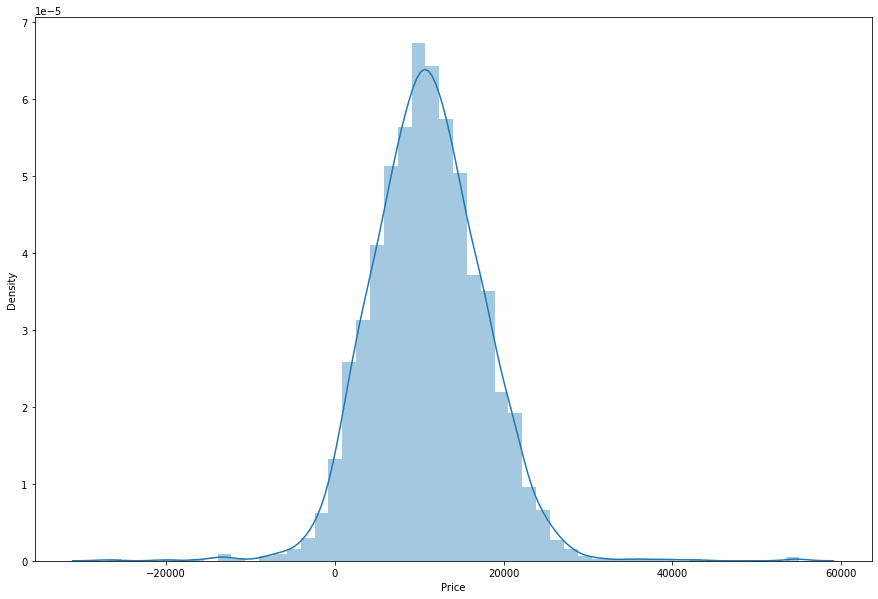

In [173]:
y_test = pd.read_excel('./data/Sample_submission.xlsx')
pred = rf_random.predict(df_test)
plt.figure(figsize = (15,10))
sns.distplot(y_test['Price']-pred)
plt.show()

In [174]:
import pickle
file = open('flight_pred.pkl', 'wb')
pickle.dump(reg_rf, file)